In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Analysis

In [2]:
path = "./mtcars.csv"
df = pd.read_csv(path)
df.rename(columns={"Unnamed: 0":"model"}, inplace=True)
df.set_index("model", inplace = True)

s = f"""# DF information
- Column names: {df.columns}
- Shape of dataframe: {df.shape}
"""
print(s)

# DF summary
print("------------------------")
print("# DF summary")
df.info()
print()

# DF statistics
print("------------------------")
print("# DF statistics")
df.describe()

# DF information
- Column names: Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')
- Shape of dataframe: (32, 11)

------------------------
# DF summary
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB

------------------------
# DF statistics


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [3]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


## 2. Combination of gear and transmission features

### 1) Unique number of gear & transmission features

In [5]:
s = f"""# of unique value
- gear: {len(df.gear.unique())}
- transmission features: {len(df.am.unique())}"""

print(s)

# of unique value
- gear: 3
- transmission features: 2


### 2) Combination of gear & transmission features

In [6]:
comb_gear_am = df.groupby(by=["gear", "am"]).size()
comb_gear_am

gear  am
3     0     15
4     0      4
      1      8
5     1      5
dtype: int64

In [11]:
comb_gear_am_crosstab = pd.crosstab(df["gear"], df["am"])
print(comb_gear_am_crosstab)

am     0  1
gear       
3     15  0
4      4  8
5      0  5


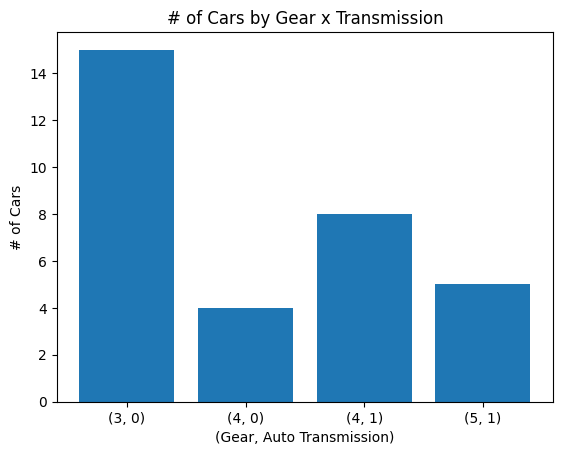

In [7]:
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("(Gear, Auto Transmission)")
plt.ylabel("# of Cars")
plt.bar(comb_gear_am.index.map(str), comb_gear_am.values)
plt.show()

## 3. Visualization

### 1) Histogram

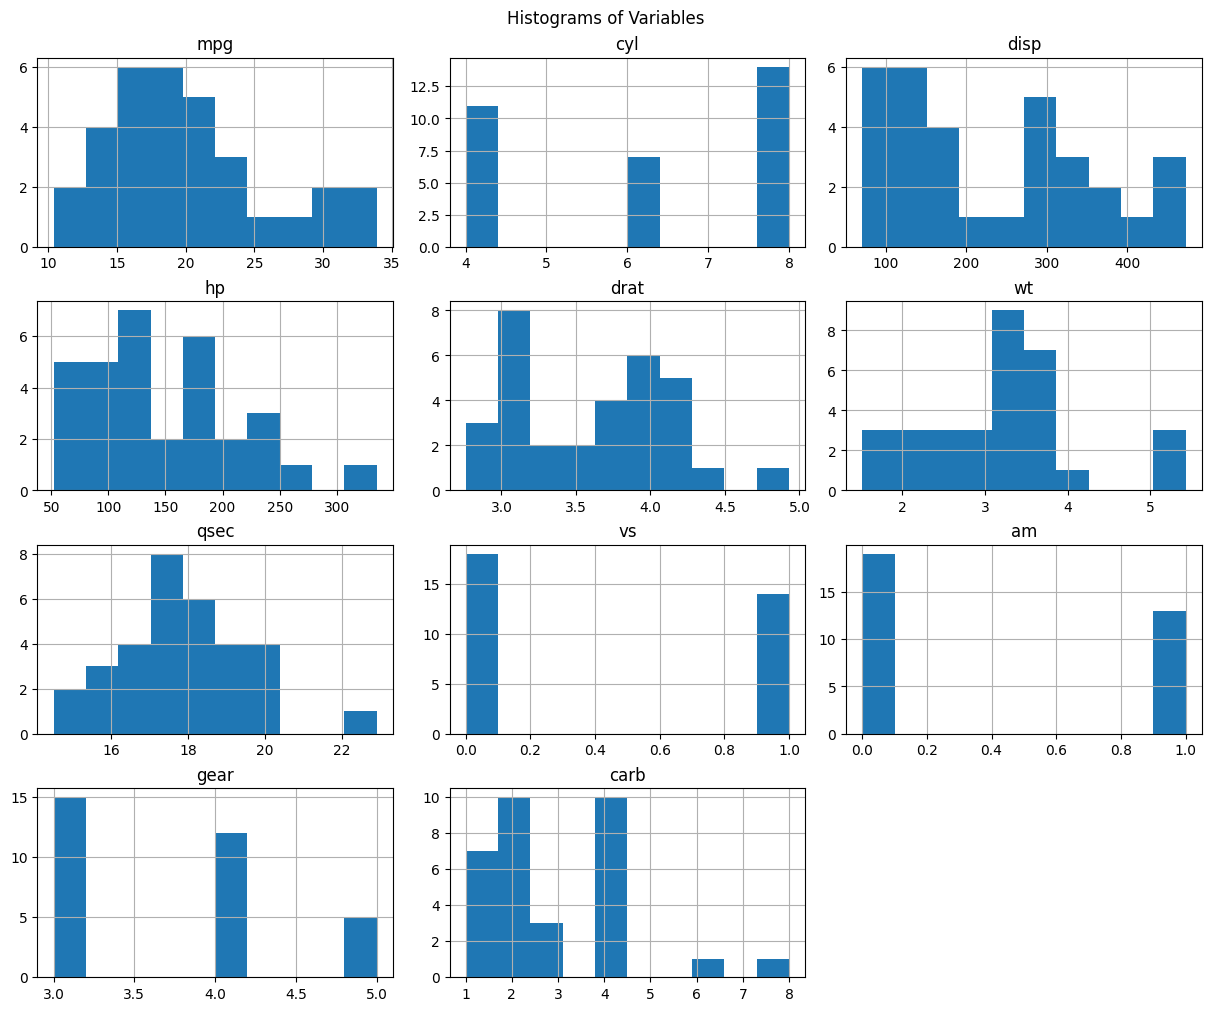

In [8]:
fig = plt.figure(figsize=(12, 10), constrained_layout=True)
fig.suptitle("Histograms of Variables")
for i in range(4):
    for j in range(3):
        idx = i*3+j
        if idx < 11:
            col_name = df.columns[idx]
            ax = plt.subplot2grid((4, 3), (i, j))
            df[col_name].hist()
            ax.set_title(col_name)
plt.show()

### 2) Scatter

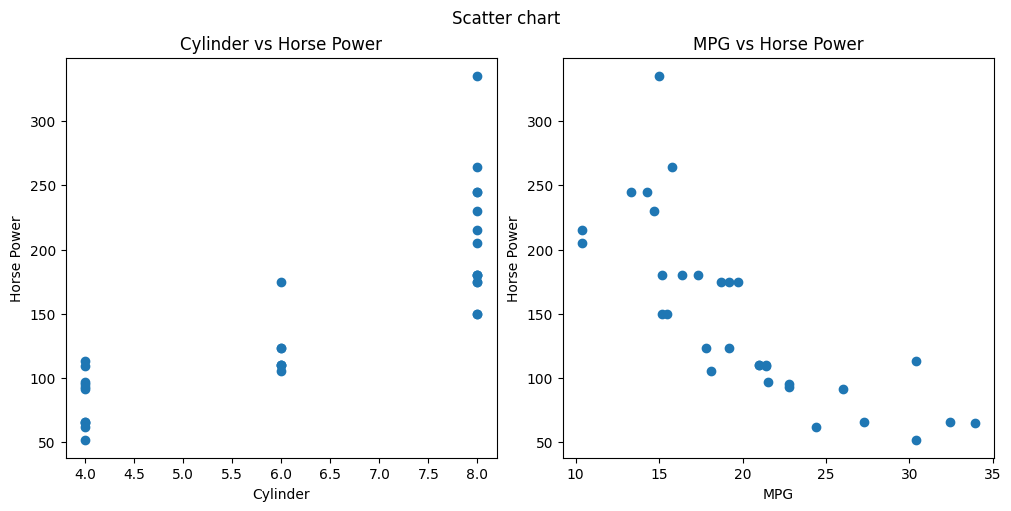

In [9]:
x_info = [("Cylinder", df.cyl.values), ("MPG", df.mpg.values)]
y_label = "Horse Power"
y_data = df.hp.values

fig = plt.figure(figsize=(10, 5), constrained_layout=True)
fig.suptitle("Scatter chart")

for i, (x_label, x_data) in enumerate(x_info):
    ax = plt.subplot2grid((1, 2), (0, i))
    ax.scatter(x_data, y_data)
    ax.set_title(f"{x_label} vs {y_label}")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

plt.show()

### 3) Correlation

In [10]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
